
# Project: The Movie Database Dataset Analysis(TMDb) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The colums are: id, imdb_id, popularity, budget	revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj	and revenue_adj. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


> Questions:
> 1. Top 3 Movies with highest revenue
> 2. Bottom 3 movies with lowest revenue
> 3. Explore the relationship between budget and revenue
> 4. Explore how revenue has progressed over the years

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [38]:
#loading the data
df = pd.read_csv(r'C:/Users/USER/Desktop/tmbd.csv')
#viewing fist 5 rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
#viewing last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [42]:
#Displayimh the distribution o the dataframe

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [43]:
#Displaying the summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are some missing data. Home page column has only 2936 filled rows. If i remove missing data, I'll have a grately reduced dataset. This means that i'll remove some columns i don't need instead. I also noticed i would need to change the data type of release_date and relaase_year. I'll do this under data cleaning

In [44]:
def plot_hist(data, fig_size):
    return data.hist(figsize=fig_size)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

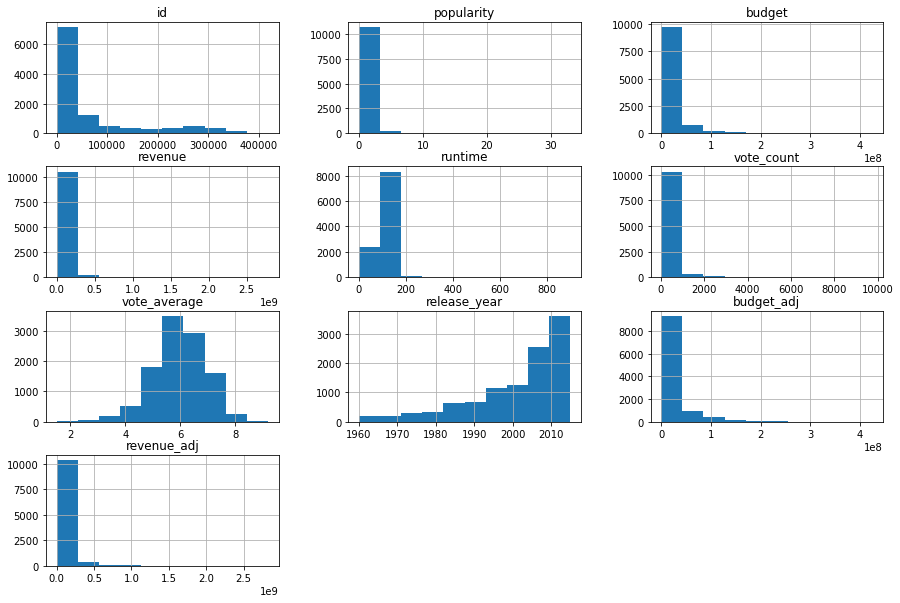

In [25]:
plot_hist(df, (15,10))



### Data Cleaning

In [45]:
#Removing some unnecessary columns
#Budget_adj and revenue_adj take inflation into consideration so i'll take out budget and revenue


df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'director', 'keywords', 'overview', 'budget', 'revenue', 'production_companies'], axis = 1, inplace = True)
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [46]:
#viewing the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 933.9+ KB


In [47]:
#Changing release_date to date format

df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   original_title  10866 non-null  object        
 3   runtime         10866 non-null  int64         
 4   genres          10843 non-null  object        
 5   release_date    10866 non-null  datetime64[ns]
 6   vote_count      10866 non-null  int64         
 7   vote_average    10866 non-null  float64       
 8   release_year    10866 non-null  int64         
 9   budget_adj      10866 non-null  float64       
 10  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 933.9+ KB


In [48]:
#Checking for duplicate rows
sum(df.duplicated())

1

In [49]:
#Removing the 1 duplicated row. 
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   original_title  10865 non-null  object        
 3   runtime         10865 non-null  int64         
 4   genres          10842 non-null  object        
 5   release_date    10865 non-null  datetime64[ns]
 6   vote_count      10865 non-null  int64         
 7   vote_average    10865 non-null  float64       
 8   release_year    10865 non-null  int64         
 9   budget_adj      10865 non-null  float64       
 10  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 1018.6+ KB


In [50]:
#During exploration, i noticed some movies had 0 budget, 0 revenue and 0 runtime. This is impossible. 
#I'll replace 0 witn np.nan which pandas will ignore and not include in my analysis
#replacing 0 with NaN of runtime column in the dataset

df['budget_adj'] = df['budget_adj'].replace(0, np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NAN)
df['runtime'] = df['runtime'].replace(0, np.NAN)
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,66066.374413,0.646446,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,92134.091971,1.000231,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,75612.000000,0.713857,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### 1. What are the top 3 films with hightest revenue?

In [51]:
#Top movies with highest reveue are: Avatar, Starwars and Titanic

df.nlargest(3,['revenue_adj'])

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,12.037933,Star Wars,121.0,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,4.355219,Titanic,194.0,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09


In [ ]:
#The budget of all top 3 movies is higher than the average budget : 1.755104e+07 

### 2. What are the bottom 3 films with lowest revenue?

In [52]:
#Bottom performng movies are: Shattered glass, Mallrate, Dr Horrible's Sing-Along blog

df.nsmallest(3,['revenue_adj'])

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,Shattered Glass,94.0,Drama|History,2003-11-14,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,Mallrats,94.0,Romance|Comedy,1995-10-20,201,6.8,1995,8.585801e+06,2.861934
3239,14301,0.352054,Dr. Horrible's Sing-Along Blog,42.0,Adventure|Action|Comedy|Science Fiction|Music,2008-07-15,140,7.7,2008,2.025573e+05,3.038360


In [ ]:
#The budget of all three bottom performing movies are lower than the average budject :1.755104e+07

### 3. What is the relationship between Revenue and budget

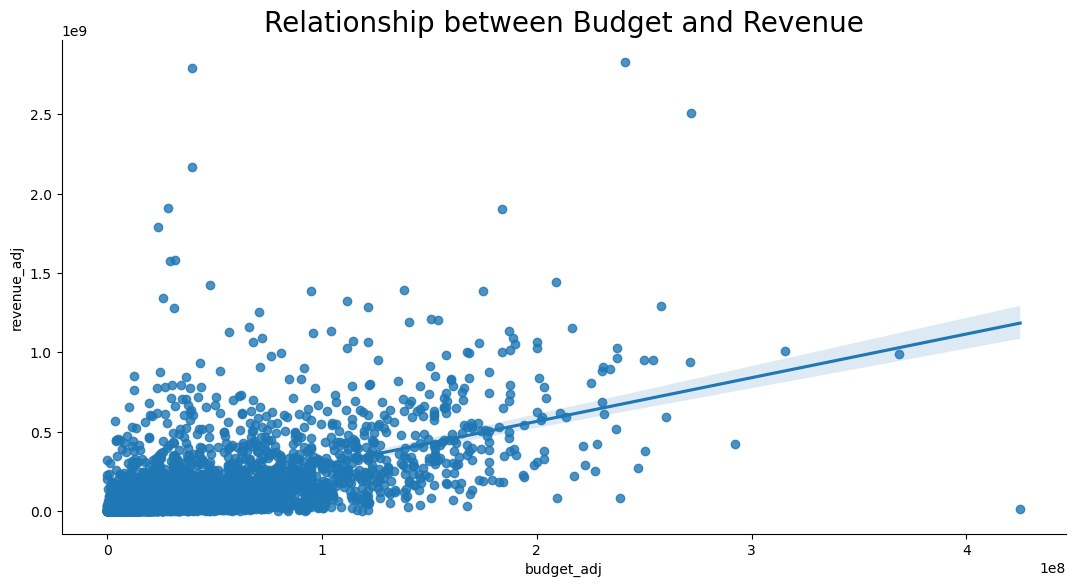

In [70]:
#Naming the plot
a=sns.lmplot(x='budget_adj', y='revenue_adj', data=df)
plt.title("Relationship between Budget and Revenue", fontsize = 20);
## Setting Plot Dimensions - FIGURE LEVEL
a.fig.set_size_inches(12, 6);

This shows there's a positive correlation between budget and revenue. Films with higher budget tend to do earn more revenue

### 4. What is the trend of revenue?

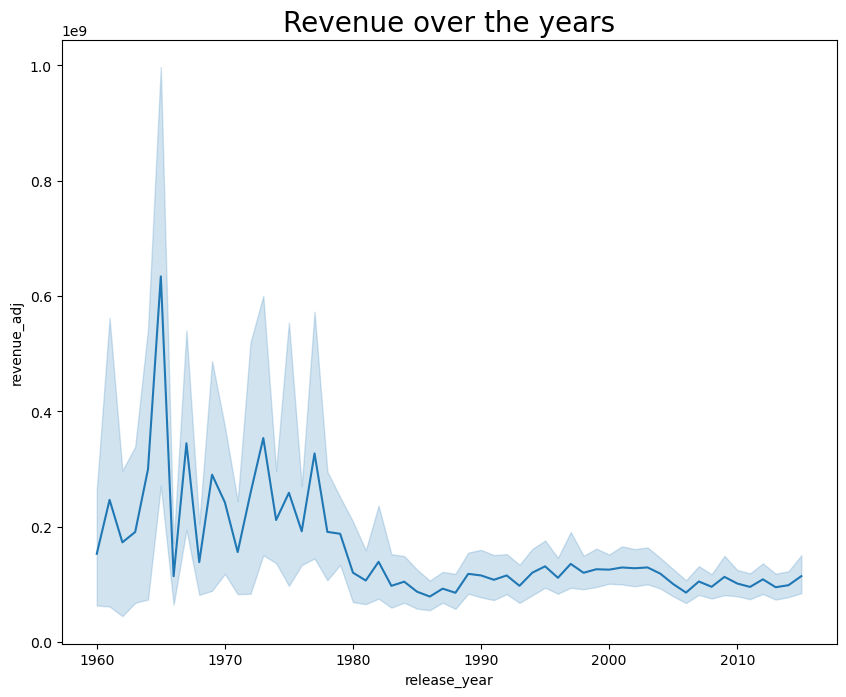

In [73]:
#Naming the plot
b=sns.lineplot(x = "release_year", y = "revenue_adj", data=df)
plt.title("Revenue over the years", fontsize = 20)
plt.show()

There has been a gradual decrease in revenue of movies over the year. However, its picking up again

<a id='conclusions'></a>
## Conclusions

> It's a very interesting dataset to work with. However, some of the limitations of the dataset is that it's a small dataset so ifereces made from it may not be all encompasing. Also, the currency was not stated. 
Here are my inferences:
As expected, the movies with a larger budget did better at the box office. Movies with higher budgets budgets usually have more investments in getting A list stars, equipments and advertising. Revenue dropped over the years but it seems like its picking up again. 